In [ ]:
# Import everything
import numpy as np
import numpy.random as npr
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [ ]:
# Data

df_A = pd.read_csv("Data_A.csv", header=None)
df_B = pd.read_csv("Data_B_nolabels.csv", header=None)

df_A.head()


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,693200.0,126,692800.0,110,693300.0,50,692700.0,165,693400.0,...,50,693500.0,50,692500.0,250,0,1,0,1,0
1,0,650400.0,501,650200.0,106,650500.0,245,650100.0,259,650600.0,...,328,650700.0,141,649900.0,277,0,0,1,1,1
2,1,636200.0,153,635800.0,150,636300.0,100,635700.0,15,636400.0,...,110,636500.0,105,635500.0,201,0,1,0,1,0
3,0,724800.0,4,724500.0,14,724900.0,50,724300.0,312,725100.0,...,100,725200.0,379,724100.0,56,1,0,0,1,1
4,0,622900.0,110,622700.0,100,623000.0,523,622600.0,300,623100.0,...,249,623200.0,605,622400.0,200,1,0,1,1,0


## (A) Build and train a binary classifier that predicts the label in the first column of Data_A.csv. Style is free, but your approach should use neural networks in a meaningful way. [5 marks]


**Hints :**
It is a good idea not to use the entire data set in Data_A.csv to do the
training, but instead split it into training and validation sets. It is also advisable
to centre and scale the features — if you do so, remember however to make the
same adjustments when predicting labels in part (B).

In [23]:
# Split the data into training, validate and testing data : 0.8.0.1,0.1 ratios
N = len(df_A[0])
Ntrain = int(N*0.8)
Nvalid = int(N*0.2)
#Ntest = int(N*0.1)

X_train = df_A.loc[0:Ntrain,1:]
X_valid = df_A.loc[Ntrain:Ntrain+Nvalid,1:]
#X_test = df_A.loc[Ntrain+Nvalid:,1:]

Y_train = df_A.loc[0:Ntrain,0]
Y_valid = df_A.loc[Ntrain:Ntrain+Nvalid,0]
#Y_test = df_A.loc[Ntrain+Nvalid:,0]


# When to scale your data?

If an algorithm uses gradient descent, then the difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale will help the gradient descent converge more quickly towards the minima.

Specifically, in the case of Neural Networks Algorithms, feature scaling benefits optimization by:

- It makes the training faster
- It prevents the optimization from getting stuck in local optima
- It gives a better error surface shape
Weight decay and Bayes optimization can be done more conveniently

## Method for scaling: Standardization
Feature standardization makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:

$$ \huge x_{scaled} = \frac{(x-\mu)}{\sigma} $$

,where the scaling mean and standard deviation are calculated from the data sets separately to prevent Data leakage

In [ ]:
# Feature Scaling and Centering by Standardization
from sklearn.preprocessing import StandardScaler

# Writing a function to scale all the X features to ~ N(0,1)
def scaling(X):
  # Select numerical columns for standardization
  numeric_cols = [i for i in range(1,22)]

  # Initialize StandardScaler
  scaler = StandardScaler()

  # Standardize numerical columns
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

  return X

scaled_X_train = scaling(X_train)
scaled_X_valid = scaling(X_valid)
#scaled_X_test = scaling(X_test)

scaled_X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.680576,-0.136562,0.681140,-0.157197,0.680213,-0.267257,0.681479,-0.122623,0.679918,-0.045299,...,-0.379322,0.679659,-0.287471,0.681990,-0.054797,-0.998557,0.999007,-1.002484,0.999456,-0.999369
1,0.354934,0.494701,0.356690,-0.163558,0.354617,-0.008571,0.356987,0.005509,0.354358,-0.160194,...,0.094345,0.354127,-0.179507,0.357442,-0.011999,-0.998557,-1.000994,0.997522,0.999456,1.000631
2,0.246894,-0.091111,0.247017,-0.093585,0.246593,-0.200927,0.247300,-0.327088,0.246345,-0.157613,...,-0.277091,0.246123,-0.222218,0.247736,-0.132466,-0.998557,0.999007,-1.002484,0.999456,-0.999369
3,0.921003,-0.341933,0.922573,-0.309865,0.920605,-0.267257,0.922182,0.077753,0.921045,-0.157613,...,-0.294130,0.920765,0.102858,0.922734,-0.362302,1.001445,-1.000994,-1.002484,0.999456,1.000631
4,0.145701,-0.163496,0.147244,-0.173100,0.145415,0.360222,0.147515,0.061396,0.145178,0.214183,...,-0.040258,0.144965,0.370987,0.147934,-0.134051,1.001445,-1.000994,0.997522,0.999456,-0.999369


## Check the number of zeros and ones

To check that the data training set and validation set both have resonably equal number of zeros and ones

In [ ]:
Y_train.describe()

count    160001.000000
mean          0.499503
std           0.500001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: 0, dtype: float64

In [ ]:
Y_valid.describe()

count    40000.000000
mean         0.502175
std          0.500002
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: 0, dtype: float64

Both train and validation data sets have equal number of zeros and ones (seen from the mean and standard deviation value).

In addition to standardization, we are ready to tackle the preblem by using $\widehat{p} \in \mathcal{N}_4(21,50,50,50,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{ReLU},\mathrm{sigmoid})$ network.

In [ ]:
# Simple FNN that includes everything as our first
# Pick 4 layers to encompass how many limit order levels from our input (double check)

n = 25
model = keras.Sequential([
    keras.layers.Dense(n, activation="relu", input_shape=(21,)),
    keras.layers.Dense(n, activation="relu"),
    keras.layers.Dense(n, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
]
)
model.summary()

# Details subject to change

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                550       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1876 (7.33 KB)
Trainable params: 1876 (7.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Finding a good learning rate η

When the model makes predictions, the error between the predicted and actual values guides updates to the model's weights. The learning rate $\eta$ plays a crucial role in determining how much the model learns in each iteration or epoch. A too-small learning rate might prevent the model from converging to the optimal weights, while a too-large learning rate could cause the model to overshoot the optimal solution.


Learning rates typically fall within the range between $10^{-6}$ and $1$. This range provides a guideline for selecting learning rates that balance effectiveness without causing convergence issues.


The diagnosis plot of loss over training epochs during training for a range of learning rates was use to find a good learning rate. Based on the plots we could visualise the properties of the models such as the velocity of the model:  has it learned too quickly? (sharp rise and plateau) or is learning too slowly? (little or no change). Are they oscillation in loss indicating a a too large learning rate?


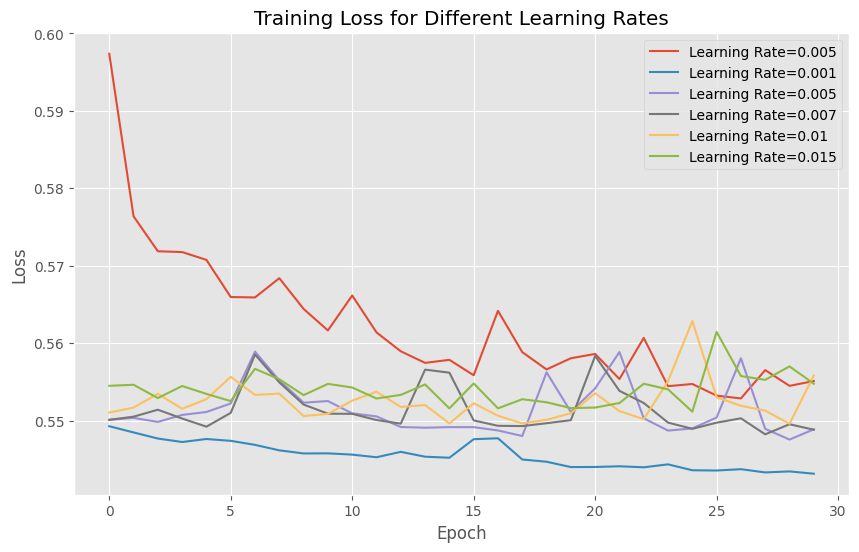

In [ ]:
def plot_training_loss_for_learning_rates(model, X_train, Y_train, X_valid, Y_valid, etas):
    plt.figure(figsize=(10, 6))
    for eta in etas:
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=eta), loss="binary_crossentropy", metrics=["accuracy"])
        history = model.fit(X_train, Y_train, batch_size=500, epochs=30, validation_data=(X_valid, Y_valid), verbose=0)
        plt.plot(history.history['loss'], label=f'Learning Rate={eta}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss for Different Learning Rates')
    plt.legend()
    plt.show()

etas = [0.005,0.001, 0.005,0.007, 0.01,0.015]
plot_training_loss_for_learning_rates(model, scaled_X_train, Y_train, scaled_X_valid, Y_valid, etas)


It is apparent that 0.0005 is extremely slow, the loss barely decays over the 50 epoch, and 0.015 is too high considering the oscillations. A good equilibrium is found for the learning rate to be  η =0.001.

In [ ]:
eta = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=eta), loss="binary_crossentropy", metrics=["accuracy"])
history =model.fit(scaled_X_train, Y_train, batch_size=500, epochs=5,validation_data=(scaled_X_valid, Y_valid))
# Check out the batch size and number of epochs


Epoch 1/5
321/321 [==============================] - 3s 5ms/step - loss: 0.6352 - accuracy: 0.6246 - val_loss: 0.5545 - val_accuracy: 0.7261
Epoch 2/5
321/321 [==============================] - 2s 6ms/step - loss: 0.5870 - accuracy: 0.6839 - val_loss: 0.5318 - val_accuracy: 0.7408
Epoch 3/5
321/321 [==============================] - 2s 6ms/step - loss: 0.5789 - accuracy: 0.6894 - val_loss: 0.5240 - val_accuracy: 0.7461
Epoch 4/5
321/321 [==============================] - 2s 5ms/step - loss: 0.5749 - accuracy: 0.6917 - val_loss: 0.5192 - val_accuracy: 0.7486
Epoch 5/5
321/321 [==============================] - 1s 4ms/step - loss: 0.5731 - accuracy: 0.6928 - val_loss: 0.5185 - val_accuracy: 0.7461


Try $\widehat{p} \in \mathcal{N}_3(21,50,50,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{sigmoid})$.

In [ ]:
# Trying with fewer number of layers

n = 25
model_FNN = keras.Sequential([
    keras.layers.Dense(n, activation="relu", input_shape=(21,)),
    keras.layers.Dense(n, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
]
)
model_FNN.summary()

eta = 0.001

model_FNN.compile(optimizer=keras.optimizers.Adam(learning_rate=eta), loss="binary_crossentropy", metrics=["accuracy"])
history =model_FNN.fit(scaled_X_train, Y_train, batch_size=500, epochs=5,validation_data=(scaled_X_valid, Y_valid))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                550       
                                                                 
 dense_5 (Dense)             (None, 25)                650       
                                                                 
 dense_6 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1226 (4.79 KB)
Trainable params: 1226 (4.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
321/321 [==============================] - 2s 4ms/step - loss: 0.6465 - accuracy: 0.6179 - val_loss: 0.5897 - val_accuracy: 0.6996
Epoch 2/5
321/321 [==============================] - 1s 3ms/step - loss: 0.6044 - accuracy: 0.6689 - val_loss: 0.5477 - val_accuracy: 0.7330
Epoc

# Turns out the accuracy is about the same so we conclude that
$\widehat{p} \in \mathcal{N}_3(21,25,25,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{sigmoid})$ is suffient. That is, for our particular task,
$\widehat{p} \in \mathcal{N}_3(21,25,25,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{sigmoid}) ⊂ \widehat{p} \in \mathcal{N}_4(21,25,25,25,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{ReLU},\mathrm{sigmoid})$.


## (B) Use the binary classifier created in part (A) to predict the labels missing from Data_B_nolabels.csv. That is, you are asked to produce 20000 predictions of the form 0/1.

In [ ]:
# Writing a function to scale all the X features to ~ N(0,1)
def scaling_B(X):
  # Select numerical columns for standardization
  numeric_cols = [i for i in range(21)]

  # Initialize StandardScaler
  scaler = StandardScaler()

  # Standardize numerical columns
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

  return X

# Convert the predicted probabilities to 0 or 1 with threshold being 0.50
def conversion_function(pred):
  ans = []
  for i in pred:
    if i[0]>= 0.50:
      ans.append(1)
    else :
      ans.append(0)

  return ans

In [ ]:
# Predicting using simple FNN with all columns as input

# Data for predicting

X = df_B

scaled_X = scaling_B(X)

pred_FNN = model.predict(scaled_X)


ans = conversion_function(pred_FNN)

count = 0 # counting number of zeros

for i in range(len(ans)):
  if ans[i] == 0 :
    count+=1

print(ans)
print(len(ans))
print(count)


625/625 [==============================] - 3s 3ms/step
[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
# Function to save the result into .txt file
# Change the name and CID!

f = open('02469995_Vanheuverswyn.txt', 'w')
for j in range(len(ans)):
  f.write(str(ans[j])+'\n')

f.close()

# There are two deliverables:
1. The report can be a Jupyter notebook, in that case it should be submitted both as a PDF and as an .ipynb file.
2. A set of predictions (details given below). Please send both your report/notebook and your set of predictions by email to l.gonon@imperial.ac.uk.
Please send one e-mail per group and mention clearly who is part of your
group.

Your solution to part (B) (set of predictions) should be a text file with 20000 rows
containing 0s and 1s. Name this file as “[your CID]_[your surname].txt”.

For example, a fictionary person John Smith with CID 00123456 should name his file as “00123456_Smith.txt”. Please adhere to this format carefully, as your solutions will be processed automatically.


If you work in a group, please submit such a file for each group member (i.e., if you work in a group of three you will submit three times the same file, but each of them named differently).
Your solution to (B) will be marked based on Accuracy, defined as
$$\mathrm{Accuracy} = \frac{\mathrm{Correct\_prediction}}{\mathrm{Total\_Labels}}$$

# Reference

- https://doi.org/10.48550/arXiv.1206.5533


